## CSV
- 필드를 쉼표로 구분한 텍스트 파일
- 엑셀 양식의 데이터를 프로그램에 상관없이 쓰기 위한 데이터 형식

In [2]:
import csv
reader=csv.reader(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_ALL)
#delimeter: 글자 나누는 기준
#quotechar: 문자열을 둘러싸는 신호문자
#quoting: 데이터 나누는 기준이 quotechar에 의해 둘러싸인 레벨

In [16]:
import csv
with open('전국+유동인구+현황.csv',"r",encoding="cp949") as file:
    csv_data=csv.reader(file)

## Web
- world wide web, 줄여서 웹
- 인터넷 공간의 정식 명칭
- 데이터 송수신을 위해 HTTP 프로토콜 사용
- 데이터 표시를 위해 HTML 형식 사용
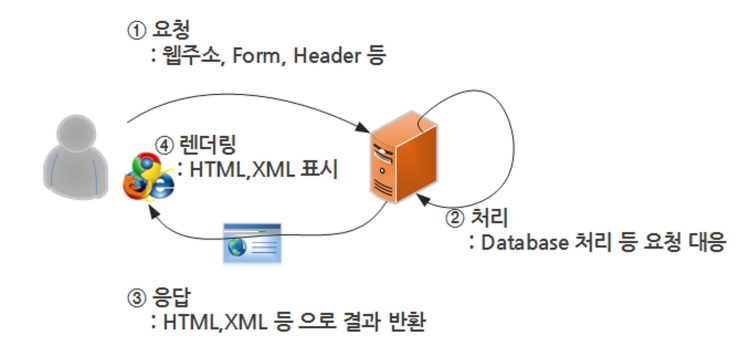

## HTML
- 웹 상의 정보를 구조적으로 표현하기 위한 언어
- 요소 표시를 위해 Tag(<>) 사용
- 모든 HTML은 트리모양의 포함관계를 가짐
- html - head - title - body - p ...

## 정규식
- 정규표현식, regex
- 복잡한 문자열 패턴 정의 공식

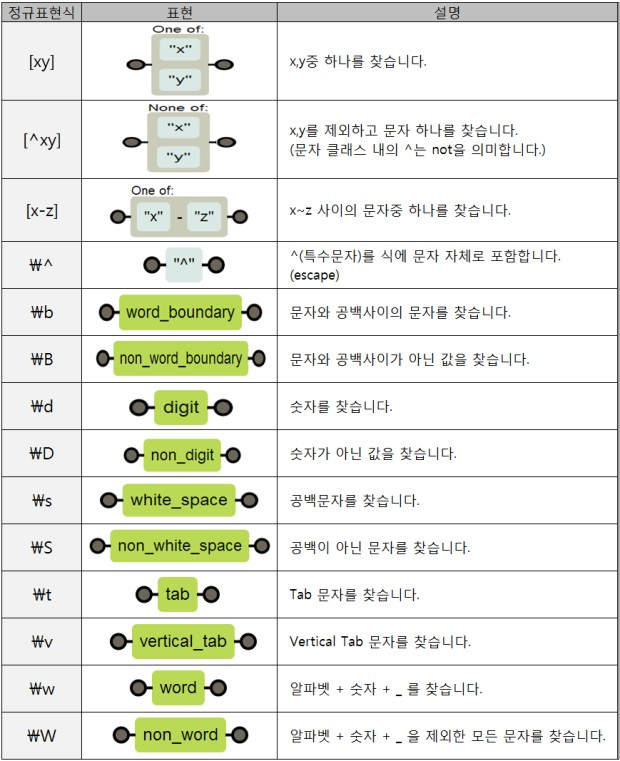

In [17]:
import re
import urllib.request

url='https://goo.gl/U7mSQl'
html=urllib.request.urlopen(url)
html_contents=str(html.read())
id_results=re.findall(r"([A-Za-z0-9]+\*\*\*)",html_contents)
for i in id_results:
    print(i)

codo***
outb7***
dubba4***
multicuspi***
crownm***
triformo***
spania***
magazin***
presby***
trophody***
nontr***
enranck***
canc***
uncanker***
wrymo***
non***
luminat***
oblig***
anna***
hyperth***
toplabl***
dolce0***
rudals2***
jjw980***
elvlz***
skmid***
qkep***
kisslov***
maskman***
sungt***


In [22]:
import re
url='https://finance.naver.com/item/main.nhn?code=005930'
html=urllib.request.urlopen(url)
html_contents=str(html.read().decode("ms949"))
stock_results=re.findall("(\<dl class=\"blind\"\>)([\s\S]+?)(\<\/dl\>)",html_contents)
samsung_stock=stock_results[0]
samsung_index=samsung_stock[1]
index_list=re.findall("(\<dd\>)([\s\S]+?)(\<\/dd\>)",samsung_index)
for i in index_list:
    print(i[1])

2023년 03월 07일 13시 50분 기준 장중
종목명 삼성전자
종목코드 005930 코스피
현재가 60,800 전일대비 하락 700 마이너스 1.14 퍼센트
전일가 61,500
시가 61,400
고가 61,400
상한가 79,900
저가 60,700
하한가 43,100
거래량 7,143,110
거래대금 435,505백만


## XML
- 데이터의 구조와 의미를 설명하는 TAG를 사용하여 표시하는 언어
- HTML과 문법이 비슷
- PC<->스마트폰 간에 정보를 주고받기 매우 유용한 저장 방식
- 가장 많이 쓰이는 parser인 beautifulsoup를 사용

In [28]:
from bs4 import BeautifulSoup
with open("books.xml","r",encoding="utf8") as books_file:
    books_xml=books_file.read()
soup = BeautifulSoup(books_xml,"lxml")
for book_info in soup.find_all("author"):
    print(book_info)
    print(book_info.get_text())

<author>Carson</author>
Carson
<author>Sungchul</author>
Sungchul


In [74]:
from bs4 import BeautifulSoup
import csv
def writeCsv(info):
    with open("output.csv","w") as csv_file:
        cw=csv.writer(csv_file,delimiter=' ',quotechar='"')
        for patent_info in info:
            cw.writerow(patent_info)

patent_info={}
with open("ipa110106.xml","r",encoding="utf8") as file:
    patent_contents="".join(file.readlines())
    soup = BeautifulSoup(patent_contents,"lxml")
    patent_document={}
    
    #특허 제목
    invention_title=soup.find("invention-title").get_text()
    patent_document["invention-title"]=invention_title
    
    #등록번호, 등록일자
    publication_reference=soup.find("publication-reference")
    document_id = publication_reference.find("document-id")
    doc_number = document_id.find("doc-number").get_text()
    date = document_id.find("date").get_text()
    patent_document["doc-number"]=doc_number
    patent_document["date"]=date
    
    #출원번호, 출원일자
    application_reference_tag = soup.find("application-reference")
    a_country = document_id.find("country").get_text()
    a_document_id = publication_reference.find("document-id")
    a_doc_number = a_document_id.find("doc-number").get_text()
    a_date = a_document_id.find("date").get_text()

    patent_document["application-country"] = a_country
    patent_document["application-date"] = a_date
print(patent_document)
writeCsv(patent_document)

{'invention-title': 'Wetsuit made with a low-absorbent, good wicking and quick drying fabric', 'doc-number': '20110000002', 'date': '20110106', 'application-country': 'US', 'application-date': '20110106'}


In [80]:
import os
from bs4 import BeautifulSoup


def wrtie_json_file(patent_info):
    import json
    with open("output.json", "w") as f:
        json.dump(patent_info, f)


patent_info = {}

with open("ipa110106.xml","r") as patent_document_file:
        patent_contents = "".join(patent_document_file.readlines())

        soup = BeautifulSoup(patent_contents, "xml")

        patnet_documnet = {}
        invetion_title = soup.find("invention-title").get_text()
        patnet_documnet["invention-title"] = invetion_title

        publication_reference_tag = soup.find("publication-reference")
        p_document_id_tag = publication_reference_tag.find("document-id")
        p_country = p_document_id_tag.find("country").get_text()
        p_doc_number = p_document_id_tag.find("doc-number").get_text()
        p_kind = p_document_id_tag.find("kind").get_text()
        p_date = p_document_id_tag.find("date").get_text()

        patnet_documnet["country"] = p_country
        patnet_documnet["doc-number"] = p_doc_number
        patnet_documnet["kind"] = p_kind
        patnet_documnet["date"] = p_date


        application_reference_tag = soup.find("application-reference")
        a_country = p_document_id_tag.find("country").get_text()
        a_document_id_tag = publication_reference_tag.find("document-id")
        a_doc_number = a_document_id_tag.find("doc-number").get_text()
        a_date = a_document_id_tag.find("date").get_text()

        patent_key_value = a_doc_number
        # print(patent_key_value)

        patnet_documnet["application-country"] = a_country
        patnet_documnet["application-date"] = a_date

        patent_info[patent_key_value] =  patnet_documnet
    
print(patent_info)

wrtie_json_file(patent_info)


{'20110000002': {'invention-title': 'Wetsuit made with a low-absorbent, good wicking and quick drying fabric', 'country': 'US', 'doc-number': '20110000002', 'kind': 'A1', 'date': '20110106', 'application-country': 'US', 'application-date': '20110106'}}


## JSON
- JS의 데이터 객체 표현 방식
- 간결성으로 기계/인간 모두 이해하기 편함
- XML 대체제로 많이 사용됨
- python의 dict와 유사 (key:value 쌍)


In [85]:
import json
with open("json_example.json","r",encoding="utf8") as f: 
    contents=f.read() #json 읽어오기
    json_data=json.loads(contents)
    print(json_data['employees'])

[{'firstName': 'John', 'lastName': 'Doe'}, {'firstName': 'Anna', 'lastName': 'Smith'}, {'firstName': 'Peter', 'lastName': 'Jones'}]


In [86]:
import json
data={"Name": "Zara", "Age": 7, "Class": "First"}
with open("data.json","w") as f: #json 쓰기
    json.dump(data,f)